# Automating Excel with Python

## Mike Driscoll ([@driscollis](https://twitter.com/driscollis))


# About Me

* Author
* Blogger
* Content creator
* Wrote a book on Excel and Python

# Python Excel Packages

- [OpenPyXL](https://openpyxl.readthedocs.io/en/stable/) (free)
- [XlsxWriter](https://pypi.org/project/XlsxWriter/) (free)
- [xlrd](https://pypi.org/project/xlrd/) / [xlwt](https://pypi.python.org/pypi/xlwt) (free)
- [XLWings](https://www.xlwings.org/) (free and paid versions)
- [PyXLL](https://www.pyxll.com/) (paid)
- [Website of Excel tools for Python](https://www.python-excel.org/)

# Why OpenPyXL?

- Free
- Works without Excel
- Reads and Writes Excel

# Installation

```
python3 -m pip install openpyxl
```

# Reading Excel Spreadsheets

We will look at several different reading methods!

In [20]:
from openpyxl import load_workbook


def open_workbook(path):
    workbook = load_workbook(filename=path)
    print(f"Worksheet names: {workbook.sheetnames}")
    sheet = workbook.active
    print(sheet)
    print(f"The title of the Worksheet is: {sheet.title}")


if __name__ == "__main__":
    open_workbook("books.xlsx")

Worksheet names: ['Sheet 1 - Books', 'Sales']
<Worksheet "Sales">
The title of the Worksheet is: Sales


# Reading Specific Cells

In [21]:
from openpyxl import load_workbook


def get_cell_info(path):
    workbook = load_workbook(filename=path)
    sheet = workbook.active
    print(sheet)
    print(f'The title of the Worksheet is: {sheet.title}')
    print(f'The value of {sheet["A2"].value=}')
    print(f'The value of {sheet["A3"].value=}')
    cell = sheet['B3']
    print(f'{cell.value=}')
    
if __name__ == '__main__':
    get_cell_info('books.xlsx')

<Worksheet "Sales">
The title of the Worksheet is: Sales
The value of sheet["A2"].value='Python 101'
The value of sheet["A3"].value='wxPython Recipes'
cell.value=5


# Reading a Range of Cells

In [22]:
import openpyxl
from openpyxl import load_workbook


def iterating_over_values(path, sheet_name, cell_range):
    workbook = load_workbook(filename=path)
    if sheet_name not in workbook.sheetnames:
        print(f"'{sheet_name}' not found. Quitting.")
        return

    sheet = workbook[sheet_name]
    for column in sheet[cell_range]:
        for cell in column:
            if isinstance(cell, openpyxl.cell.cell.MergedCell):
                # Skip this cell
                continue
            print(f"{cell.column_letter}{cell.row} = {cell.value}")


if __name__ == "__main__":
    iterating_over_values("books.xlsx", sheet_name="Sheet 1 - Books",
                          cell_range="A1:B6")


A1 = Books
A2 = Title
B2 = Author
A3 = Python 101
B3 = Mike Driscoll
A4 = wxPython Recipes
B4 = Mike Driscoll
A5 = Python Interviews
B5 = Mike Driscoll
A6 = None
B6 = None


# Reading All Data

In [ ]:
import openpyxl
from openpyxl import load_workbook

workbook = load_workbook(filename="books.xlsx")
for sheet_name in workbook.sheetnames:
    sheet = workbook[sheet_name]
    print(f"{sheet.title=}")
    for value in sheet.iter_rows(values_only=True):
        print(value)

# Creating Excel Spreadsheets


In [ ]:
from openpyxl import Workbook

workbook = Workbook()
workbook.save("hello.xlsx")

# Creating Sheets

In [23]:
import openpyxl


workbook = openpyxl.Workbook()
print(workbook.sheetnames)
# Add a new worksheet
workbook.create_sheet()
print(workbook.sheetnames)
# Insert a worksheet
workbook.create_sheet(index=1, title="Second sheet")
print(workbook.sheetnames)
workbook.save("sheets.xlsx")

['Sheet']
['Sheet', 'Sheet1']
['Sheet', 'Second sheet', 'Sheet1']


# Adding Data

In [ ]:
from openpyxl import Workbook

workbook = Workbook()
sheet = workbook.active
sheet["A1"] = "Hello"
sheet["A2"] = "from"
sheet["A3"] = "OpenPyXL"
workbook.save("hello.xlsx")

# Deleting Data

In [ ]:
from openpyxl import Workbook

workbook = Workbook()
sheet = workbook.active
sheet["A1"] = "Hello"
sheet["B1"] = "from"
sheet["C1"] = "OpenPyXL"
sheet["A2"] = "row 2"
sheet["A3"] = "row 3"
sheet["A4"] = "row 4"
# Delete column A
sheet.delete_cols(idx=1)
# delete 2 rows starting on the second row
sheet.delete_rows(idx=2, amount=2)
workbook.save("deleting.xlsx")

# Cell Styling

In [24]:
from openpyxl import Workbook

workbook = Workbook()
sheet = workbook.active
sheet["A1"].value = "Hello"
sheet["A1"].style = "Title"

sheet["A2"].value = "from"
sheet["A2"].style = "Headline 1"

sheet["A3"].value = "OpenPyXL"
sheet["A3"].style = "Headline 2"

workbook.save("builtin_styles.xlsx")

# Cell Styling

In [25]:
# named_style.py

from openpyxl import Workbook
from openpyxl.styles import Font, Border, Side, NamedStyle

workbook = Workbook()
sheet = workbook.active

red = "00FF0000"
font = Font(bold=True, size=22)
thick = Side(style="thick", color=red)
border = Border(left=thick, right=thick, top=thick, bottom=thick)
named_style = NamedStyle(name="highlight", font=font, border=border)

sheet["A1"].value = "Hello"
sheet["A1"].style = named_style

sheet["A2"].value = "from"
sheet["A3"].value = "OpenPyXL"

workbook.save("named_style.xlsx")

# Fonts

In [ ]:
import openpyxl
from openpyxl.styles import Font


workbook = openpyxl.Workbook()
sheet = workbook.active
cell = sheet["A1"]
cell.font = Font(size=12)
cell.value = "Hello"

cell2 = sheet["A2"]
cell2.font = Font(name="Arial", size=14, color="00FF0000")
sheet["A2"] = "from"

cell2 = sheet["A3"]
cell2.font = Font(name="Tahoma", size=16, color="00339966")
sheet["A3"] = "OpenPyXL"

workbook.save("font_demo.xlsx")

# Creating Charts

In [26]:
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference

workbook = Workbook()
sheet = workbook.active

# Add data to spreadsheet
data_rows = [["Book", "Kindle", "Paperback"], [1, 9.99, 15.99],
             [2, 9.99, 25.99], [3, 9.99, 25.99], [4, 4.99, 29.99],
             [5, 14.99, 39.99],]

for row in data_rows:
    sheet.append(row)

# Create the bar chart
bar_chart = BarChart()

data = Reference(worksheet=sheet,
                 min_row=1,
                 max_row=10,
                 min_col=2,
                 max_col=3)
bar_chart.add_data(data, titles_from_data=True)
sheet.add_chart(bar_chart, "E2")

workbook.save("bar_chart.xlsx")

# Other charts

(see book code examples)

# 🐼 pandas and Excel 🐼

https://pandas.pydata.org/

# Creating Excel with pandas 🐼

In [ ]:
import pandas as pd

df = pd.DataFrame([[100, 433, 10], [34, 10, 0], [75, 125, 5]],
                  index=['Python 101', 'Python 201', 'wxPython'],
                  columns=['Amazon', 'Leanpub', 'Gumroad'])
df.to_excel('pandas_to_excel.xlsx', sheet_name='Books')

# Combining OpenPyXL and pandas 🐼

In [ ]:
import pandas as pd
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows

workbook = openpyxl.Workbook()
sheet = workbook.active

df = pd.DataFrame(
    [[100, 433, 10], [34, 10, 0], [75, 125, 5]],
    index=["Python 101", "Python 201", "wxPython"],
    columns=["Amazon", "Leanpub", "Gumroad"],
)

for row in dataframe_to_rows(df):
    sheet.append(row)
workbook.save("df_to_excel.xlsx")

# Convert CSV to Excel with pandas 🐼

In [ ]:
import pandas as pd


def csv_to_excel(csv_file, excel_file, sheet_name):
    df = pd.read_csv(csv_file)
    df.to_excel(excel_file, sheet_name=sheet_name)
    
    
if __name__ == "__main__":
    csv_to_excel("books.csv", "pandas_csv_to_excel.xlsx", "Books")

# Plotting with pandas 🐼

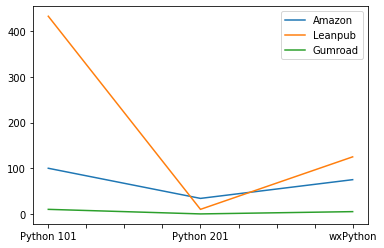

In [27]:
import pandas as pd

df = pd.DataFrame([[100, 433, 10], [34, 10, 0], [75, 125, 5]],
                  index=['Python 101', 'Python 201', 'wxPython'],
                  columns=['Amazon', 'Leanpub', 'Gumroad'])
df.plot()

# XlsxWriter

https://pypi.org/project/XlsxWriter/

# Pros and Cons of XlsxWriter

- Can do similar things as OpenPyXL
- Can do Sparklines, which OpenPyXL **CANNOT** do!
- Does data validation
- Can't read Excel - only write!

# Create Excel with XslxWriter

In [ ]:
import xlsxwriter


workbook = xlsxwriter.Workbook("hello.xlsx"))
sheet = workbook.add_worksheet(name="Hello")
data = [["Python 101", 1000],
        ["Jupyter Notebook 101", 400],
        ["ReportLab: PDF Processing", 250]
]

row = 0
col = 0
for book, sales in data:
    sheet.write(row, col, book)
    sheet.write(row, col + 1, sales)
    row += 1

sheet2 = workbook.add_worksheet(name="World")
workbook.close()

# Data Validation

In [ ]:
import xlsxwriter

workbook = xlsxwriter.Workbook("validation.xlsx")
sheet = workbook.add_worksheet()

sheet.set_column('A:A', 34)
sheet.set_column('B:B', 15)

header_format = workbook.add_format(
    {
        "border": 1,
        "bg_color": "#33f3ff",
        "bold": True,
        "text_wrap": True,
        "valign": "vcenter",
        "indent": 1,
    }
)

sheet.write("A1", "Data Validation Example", header_format)
sheet.write("B1", "Enter Values Here", header_format)

sheet.write("A3", "Enter an integer between 1 and 15")
sheet.data_validation(
    "B3",
    {"validate": "integer", "criteria": "between",
     "minimum": 1, "maximum": 15},
)
workbook.close()

# Questions